In [52]:
import pandas as pd
import plotly.graph_objs as go
from plotly import colors as cs

In [30]:
# Load the data, skipping the first row and setting the first column as the index
data = pd.read_csv('ccpi_model_chi2_by_variable.csv', header=0, index_col=0)
data = data.fillna(0)

In [33]:
data

,Tpi_chi2_no_syst,Tpi_logchi2_no_syst,Tpi_chi2_syst,Tpi_logchi2_syst,thpi_chi2_no_syst,thpi_logchi2_no_syst,thpi_chi2_syst,thpi_logchi2_syst,q2_chi2_no_syst,q2_logchi2_no_syst,...,pzmu_chi2_syst,pzmu_logchi2_syst,pmu_chi2_no_syst,pmu_logchi2_no_syst,pmu_chi2_syst,pmu_logchi2_syst,thmu_chi2_no_syst,thmu_logchi2_no_syst,thmu_chi2_syst,thmu_logchi2_syst
model,,,,,,,,,,,,,,,,,,,,,
GENIE v2.12.6,0.0000,149.2950,0.0000,100.9120,71.6322,6.51202,0.0,0.0,24.6726,31.1815,...,41.6660,39.0577,32.1063,28.9744,31.3921,28.5553,37.1693,35.5344,34.0375,31.4346
GENIE v3 hA empirical 2p2h,75.4878,98.5293,68.4461,84.4242,43.9173,3.99248,0.0,0.0,25.5212,31.3471,...,26.0684,41.2503,24.1889,35.7354,18.8641,28.8969,19.7492,28.7091,18.5148,25.7634
GENIE v3 hN empirical 2p2h,48.9003,61.1638,44.9322,54.3024,30.5826,2.78024,0.0,0.0,20.8284,26.0079,...,26.2588,36.4178,22.9231,30.1886,19.3235,26.1112,15.4378,21.8257,14.0936,19.2515
GiBUU,49.4490,73.8266,51.0090,75.8346,37.3839,3.39854,0.0,0.0,18.6989,24.1675,...,26.7482,40.2687,25.2187,35.3492,19.7429,28.6173,18.7325,29.4017,16.7377,24.9694
NEUT LFG,61.2999,67.7611,57.5452,65.5476,32.1582,2.92348,0.0,0.0,10.8694,17.0380,...,33.8826,36.7442,30.1816,31.0293,27.5012,28.6466,20.4995,26.1603,17.4536,21.6736
NEUT SF,59.5656,69.0038,56.5187,66.8736,30.2403,2.74912,0.0,0.0,11.2616,18.0510,...,32.6643,36.2821,27.9453,29.4817,24.7922,26.5640,24.1209,32.2013,20.5160,26.5567
NuWro LFG,65.0521,89.9854,58.2761,78.3682,22.6131,2.05574,0.0,0.0,27.7242,34.0579,...,29.5406,38.9765,25.4272,31.7163,22.3365,28.4560,19.7123,27.0562,18.3560,24.4678
NuWro SF,66.7584,88.8344,59.0508,76.4871,22.2718,2.02471,0.0,0.0,27.8373,34.2472,...,29.6158,38.6284,25.5445,31.4932,22.6008,28.4265,20.0788,27.2006,18.7233,24.6450


In [4]:
data.columns

Index(['Tpi_chi2_no_syst', 'Tpi_logchi2_no_syst', 'Tpi_chi2_syst',
       'Tpi_logchi2_syst', 'thpi_chi2_no_syst', 'thpi_logchi2_no_syst',
       'thpi_chi2_syst', 'thpi_logchi2_syst', 'q2_chi2_no_syst',
       'q2_logchi2_no_syst', 'q2_chi2_syst', 'q2_logchi2_syst',
       'ptmu_chi2_no_syst', 'ptmu_logchi2_no_syst', 'ptmu_chi2_syst',
       'ptmu_logchi2_syst', 'pzmu_chi2_no_syst', 'pzmu_logchi2_no_syst',
       'pzmu_chi2_syst', 'pzmu_logchi2_syst', 'pmu_chi2_no_syst',
       'pmu_logchi2_no_syst', 'pmu_chi2_syst', 'pmu_logchi2_syst',
       'thmu_chi2_no_syst', 'thmu_logchi2_no_syst', 'thmu_chi2_syst',
       'thmu_logchi2_syst'],
      dtype='object')

In [57]:
# one plot for each variable, x-axis = model, y-axis = log norm chi2
def plot_chi2s_by_variable(data, variable, show = True, save = False):
    fig = go.Figure()

    no_syst = variable + "_logchi2_no_syst"
    syst = variable + "_logchi2_syst"
    min_value = 0
    max_value = data[[no_syst, syst]].max().max()*1.1
    # Plot the two series for each pair
    fig.add_trace(go.Scatter(
        x=data.index,
        y=data[no_syst],
        mode='markers',
        name=variable + " - no syst",
        marker=dict(size=10, color=cs.DEFAULT_PLOTLY_COLORS[0])
    ))
    fig.add_trace(go.Scatter(
        x=data.index,
        y=data[syst],
        mode='markers',
        name=variable + " - syst",
        marker=dict(size=10, color=cs.DEFAULT_PLOTLY_COLORS[1])
    ))
    
    # Draw arrows from each "no_syst" point to the corresponding "syst" point
    for i in range(len(data)):
        fig.add_annotation(
            x=data.index[i],  # x-coordinate for the arrowhead
            y=data[syst].iloc[i],  # y-coordinate for the arrowhead (syst)
            ax=data.index[i],  # x-coordinate for arrow start (same as x)
            ay=data[no_syst].iloc[i],  # y-coordinate for arrow start (no_syst)
            xref="x",
            yref="y",
            axref="x",
            ayref="y",
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=1.5,
            arrowcolor="gray"
        )
        
    fig.update_layout(
        title=variable + " Log Normal Chi2",
        xaxis_title="Models",
        yaxis_title="Log Norm Chi2",
        legend_title="Series",
        height=800,
        autosize=False,
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(
            tickmode='linear',
            showgrid=True,
            gridcolor='lightgray',
            linecolor='black'
        ),
        yaxis=dict(
            range=[min_value, max_value],  # Set fixed range
            autorange=False,
            showgrid=True,
            gridcolor='lightgray',
            linecolor='black'
        )
    )
    
    # Show plot
    if show:
        fig.show()

    if save:
        fig.write_image(f"{variable}_logchi2_comparison.png")

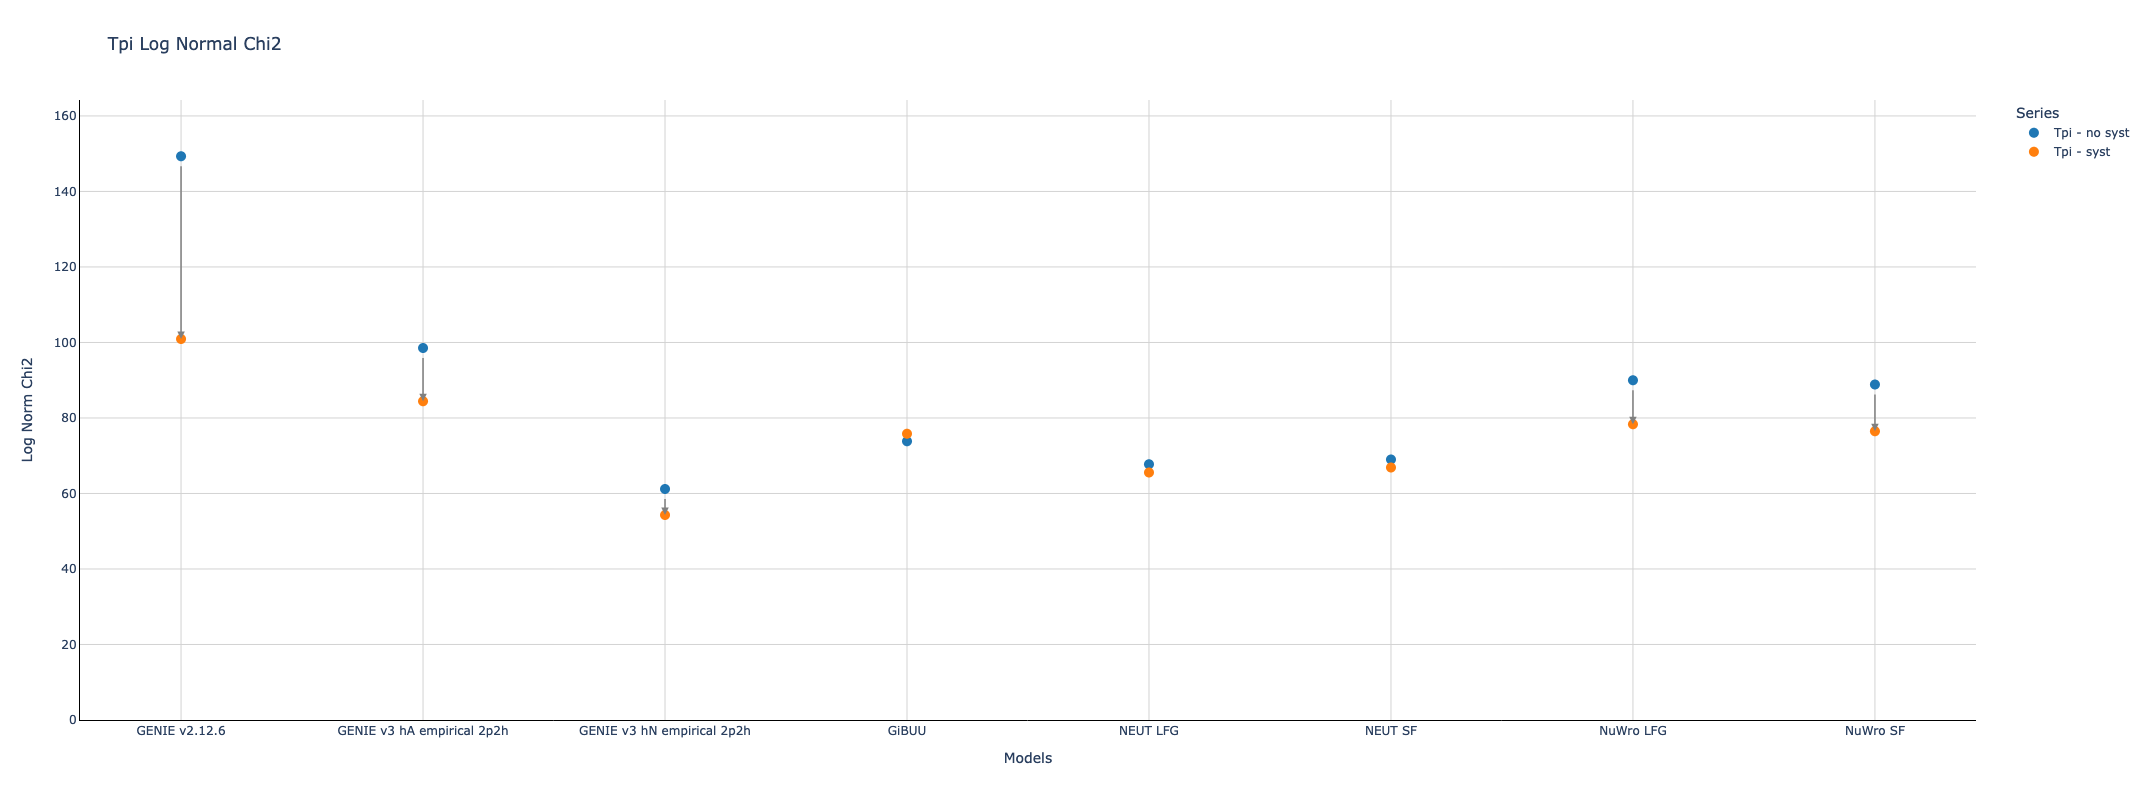

In [58]:
plot_chi2s_by_variable(data, "Tpi")

In [59]:
variables = ["Tpi", "q2", "thpi", "pmu", "pzmu", "ptmu", "thpi", "thmu"]
for v in variables:
    plot_together(data, v, show = False, save = True)

In [60]:
# one plot for each model, x-axis = model, y-axis = log norm chi2
import plotly.graph_objs as go

def plot_chi2s_by_model(data, model, show=True, save=False):
    # Identify variable names by looking for "logchi2_no_syst" and "logchi2_syst" pairs in columns
    variables = sorted(set(col.split('_logchi2')[0] for col in data.columns if 'logchi2' in col))
    
    fig = go.Figure()

    legend_added = {"no_syst": False, "syst": False} 
    
    # Loop through each variable and plot the "no_syst" and "syst" points with arrows
    for variable in variables:
        no_syst = f"{variable}_logchi2_no_syst"
        syst = f"{variable}_logchi2_syst"
        
        # Check if both columns exist for the variable
        if no_syst in data.columns and syst in data.columns:
            fig.add_trace(go.Scatter(
                x=[variable],  # Single x-point for the variable
                y=[data[no_syst][model]],  # Y-point for no syst
                mode='markers',
                name="No syst",
                marker=dict(size=10, color=cs.DEFAULT_PLOTLY_COLORS[0]),
                showlegend=not legend_added["no_syst"],
            ))
            legend_added["no_syst"] = True
            fig.add_trace(go.Scatter(
                x=[variable],  # Single x-point for the variable
                y=[data[syst][model]],  # Y-point for syst
                mode='markers',
                name="Syst",
                marker=dict(size=10, color=cs.DEFAULT_PLOTLY_COLORS[1]),
                showlegend=not legend_added["syst"],
            ))
            legend_added["syst"] = True
            
            # Draw an arrow from "no_syst" to "syst" for this variable
            fig.add_annotation(
                x=variable,  # Variable as the x-point
                y=data[syst][model],  # Y-coordinate for syst
                ax=variable,  # Same x for arrow start
                ay=data[no_syst][model],  # Y-coordinate for no syst
                xref="x",
                yref="y",
                axref="x",
                ayref="y",
                showarrow=True,
                arrowhead=2,
                arrowsize=1,
                arrowwidth=1.5,
                arrowcolor="gray"
            )

    # Set min and max for y-axis based on all variables for this model
    min_value = 0
    max_value = data.loc[model, [f"{v}_logchi2_no_syst" for v in variables] + [f"{v}_logchi2_syst" for v in variables]].max() * 1.1
    
    # Update layout
    fig.update_layout(
        title=f"{model} Log Normal Chi2",
        xaxis_title="Variables",
        yaxis_title="Log Norm Chi2",
        legend_title="Series",
        height=800,
        autosize=False,
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(
            tickmode='array',
            tickvals=variables,
            showgrid=True,
            gridcolor='lightgray',
            linecolor='black'
        ),
        yaxis=dict(
            range=[min_value, max_value],  # Set fixed range
            autorange=False,
            showgrid=True,
            gridcolor='lightgray',
            linecolor='black'
        )
    )
    
    # Show plot
    if show:
        fig.show()

    # Save plot if required
    if save:
        fig.write_image(f"{model}_logchi2_comparison.png")

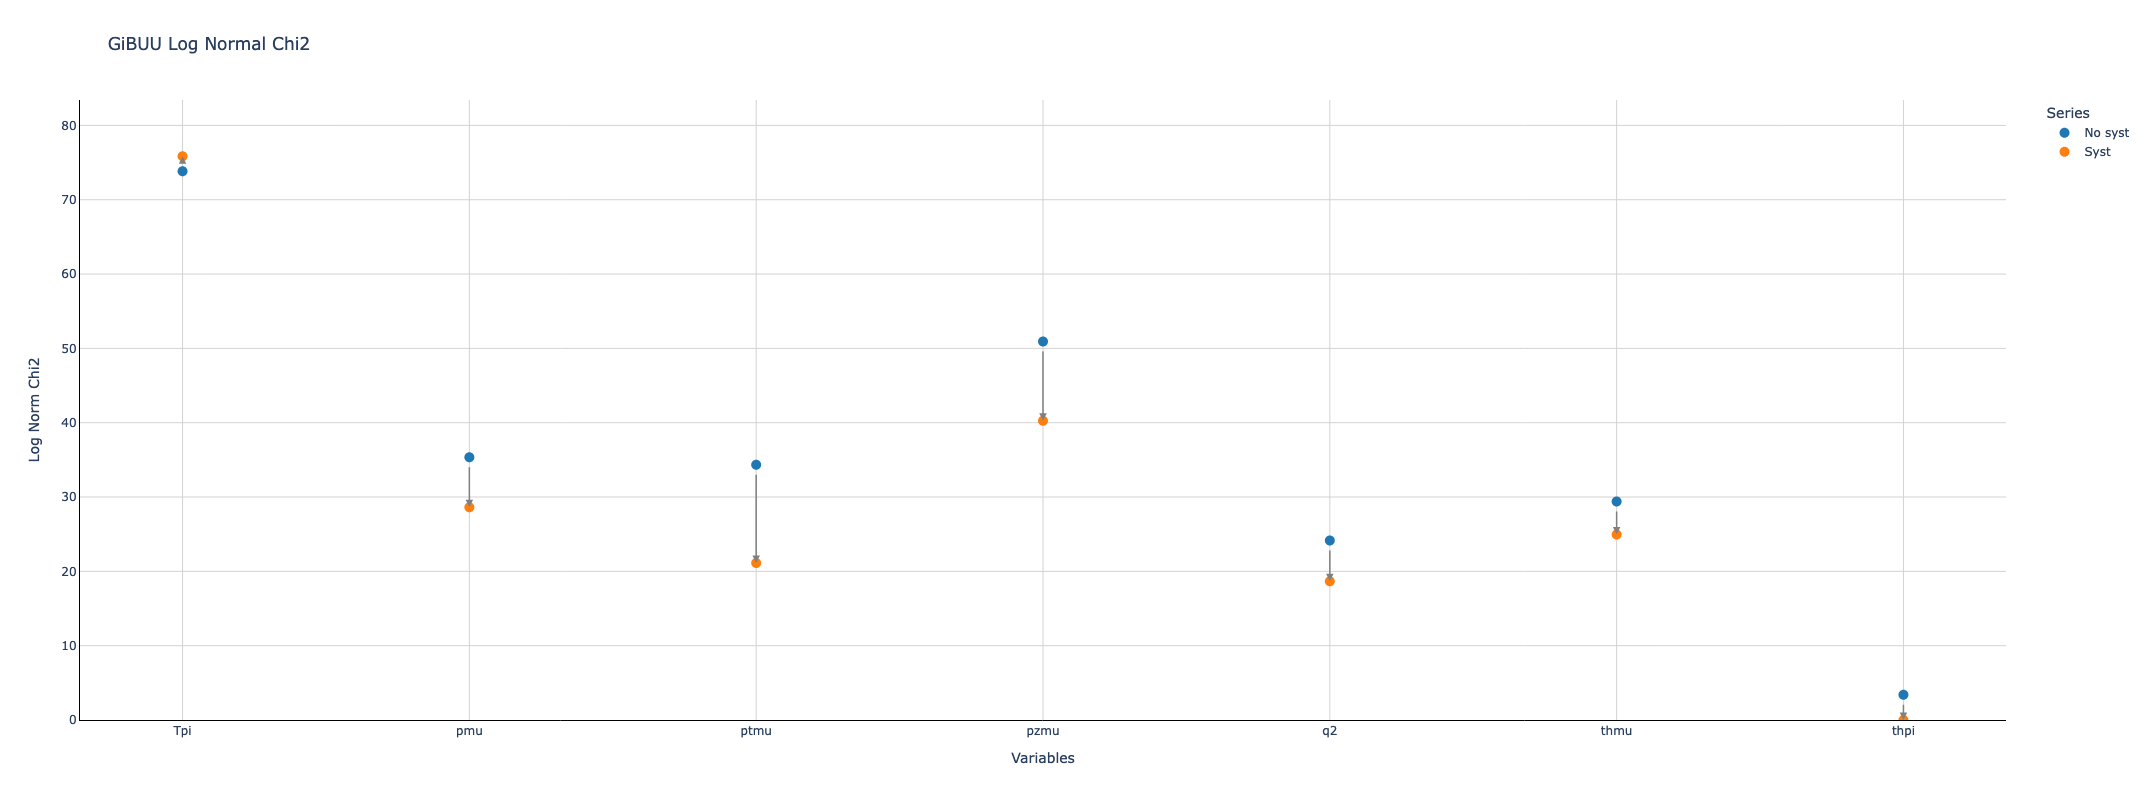

In [61]:
plot_chi2s_by_model(data, "GiBUU")

In [67]:
for m in data.index:
    plot_chi2s_by_model(data, m, show=False, save=True)